Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides - Group 9

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
###CHECK WORKING DIRECTORY
import os
os.getcwd()

'C:\\Users\\Kevin\\OneDrive\\桌面\\Columbia\\Python for data analytics'

In [ ]:
####Please upload the data and display data columns, 
####number of rows, variable types, and numeric statistics + categorical variable frequencies.

In [5]:
#put your path here.
###GET DATA PATH 
data_filename = "C:\\Users\\Kevin\\OneDrive\\桌面\\Columbia\\Python for data analytics\\nyc_data.csv"

In [6]:
data = pd.read_csv(data_filename, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] ,engine = 'python')
#pd.read_csv?
###READ DATA

head() method of DataFrames displays the first three lines of the table

In [7]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


#### Display data columns and number of rows

In [8]:
##GET DATA COLUMNS: 14 variables
print(data.columns.values,'\n',len(data.columns.values))
##GET NUMBER OF ROWS: 846945 total records
print(len(data))

['medallion' 'hack_license' 'vendor_id' 'rate_code' 'store_and_fwd_flag'
 'pickup_datetime' 'dropoff_datetime' 'passenger_count'
 'trip_time_in_secs' 'trip_distance' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude'] 
 14
846945


####  Display variable types

In [9]:
###GET VARIABLE TYPES 
print(data.dtypes)
###COUNT VARIABLE TYPES: 4 OBJECT, 3 INT64, 2 DATETIME64, 5 FLOAT64 
print(data.dtypes.groupby(data.dtypes).count())

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object
int64             3
datetime64[ns]    2
float64           5
object            4
dtype: int64


In [10]:
###WE CAN CALL PD.INFO TO SUMMARIZE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846945 entries, 0 to 846944
Data columns (total 14 columns):
medallion             846945 non-null object
hack_license          846945 non-null object
vendor_id             846945 non-null object
rate_code             846945 non-null int64
store_and_fwd_flag    424577 non-null object
pickup_datetime       846945 non-null datetime64[ns]
dropoff_datetime      846945 non-null datetime64[ns]
passenger_count       846945 non-null int64
trip_time_in_secs     846945 non-null int64
trip_distance         846945 non-null float64
pickup_longitude      846945 non-null float64
pickup_latitude       846945 non-null float64
dropoff_longitude     846945 non-null float64
dropoff_latitude      846945 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 90.5+ MB


#### Display numeric statistics

In [74]:
###GET NUMERIC STATISTICS
data.describe().transpose()
###SOME OUTLIER CAN BE SEEN HERE
###MAX TRIP DISTANCE 6*10^6?? THAT GUY TOOK A CAB TO MARS
###MIN TRIP TIME AS -10?? ANOTHER TIME TRAVEL EXAMPLE
###MAX TRIP TIME DID NOT MAKE SENSE AS WELL. MAYBE THAT GUY LIVES IN A CAB.

,count,mean,std,min,25%,50%,75%,max
rate_code,846945.0,1.026123,0.223480,0.000000,1.000000,1.000000,1.000000,6.000000e+00
passenger_count,846945.0,1.710272,1.375266,0.000000,1.000000,1.000000,2.000000,6.000000e+00
trip_time_in_secs,846945.0,812.523879,16098.305145,-10.000000,361.000000,600.000000,960.000000,4.294796e+06
trip_distance,846945.0,9.958211,6525.204888,0.000000,1.050000,1.800000,3.200000,6.005123e+06
pickup_longitude,846945.0,-73.975155,0.035142,-74.098305,-73.992371,-73.982094,-73.968048,-7.302847e+01
pickup_latitude,846945.0,40.750490,0.027224,40.009911,40.736031,40.752975,40.767460,4.099613e+01
dropoff_longitude,846945.0,-73.974197,0.033453,-74.099998,-73.991570,-73.980614,-73.965157,-7.302706e+01
dropoff_latitude,846945.0,40.750967,0.030766,40.009911,40.735207,40.753597,40.768227,4.099859e+01


#### Display categorical variable frequencies

In [12]:
###GET CATEGORICAL VARIABLE FREQUENCIES
###I DONT THINK WE NEED TO COUNT THE MEDALLION AND LICENCE
###NO NEED FOR DATETIME AS WELL
print(data.vendor_id.value_counts())
print(data.store_and_fwd_flag.value_counts())
###LOTS OF NAN VALUE FOR store_and_fwd_flag COLUMN
###TWO VENDORS CMT AND VTS HAVE SIMILAR AMOUNT OF RIDES

CMT    424678
VTS    422267
Name: vendor_id, dtype: int64
N    414599
Y      9978
Name: store_and_fwd_flag, dtype: int64


Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

In [13]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [14]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [15]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [29]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same
length.
Documentation: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

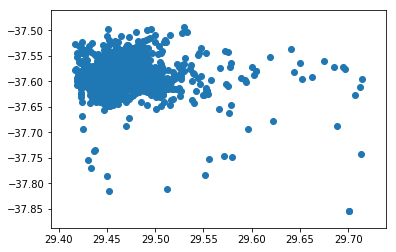

In [47]:
##Basic scatter plot
plt.scatter(px,py)

#### Display a scatter plot of pick up locations.  For which vendor is it easiest to find a cab?

In [57]:
###SCATTER PLOT FOR PICK UP LOCATION BY VENDORS
###FIRST WE COLOR CODE THE VENDOR
color = {'VTS':'red','CMT':'blue'}

In [111]:
data.px, data.py = lat_lng_to_pixels(data.pickup_latitude, data.pickup_longitude)

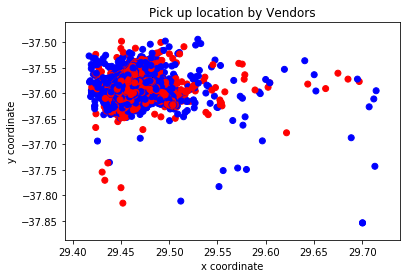

In [121]:
plt.scatter(data.px,data.py, c = data['vendor_id'].apply(lambda x: color[x]))
plt.title("Pick up location by Vendors")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show() 
####MANHATTAN IS TOO SMALL, HOW CAN WE FIGURE OUT WHERE TO CHOOSE WHICH VENDOR??

#### Answer: It is easiest to find a cab using CMT, because CMT has a higher amounts of rides (424678) than the amounts of rides of VTS(422267).¶

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

(29.4, 29.55, -37.63, -37.54)

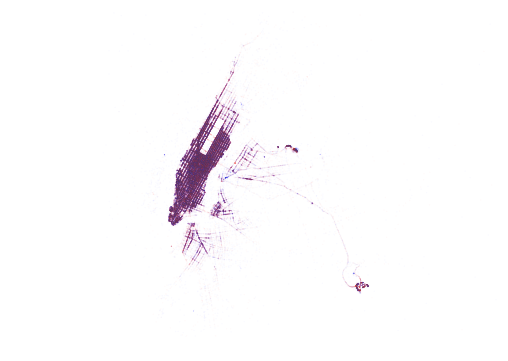

In [117]:
# Specify the figure size
plt.figure(figsize=(8, 6))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.03,c= data.vendor_id.apply(lambda x: color[x]))
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')
###IF WE COLOR CODE THE VENDOR ON THE MAP
###THE RED COLOR JUST OVERCAST THE BLUE COLOR
###WHICH MEANS THAT THE PUCK UP LOCATIONS FOR VENDORS ARE SIMILAR
###AGAIN, MAHANTTAN IS SO SMALL

#### Display a histogram of the trip distances. What is the most common trip distance?
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


In [85]:
bin_array = np.linspace(start=0., stop=15., num=150)

In [82]:
###HAVE A GLANCE OF TRIP DISTANCE
data.trip_distance.describe()

count    8.469450e+05
mean     9.958211e+00
std      6.525205e+03
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.200000e+00
max      6.005123e+06
Name: trip_distance, dtype: float64

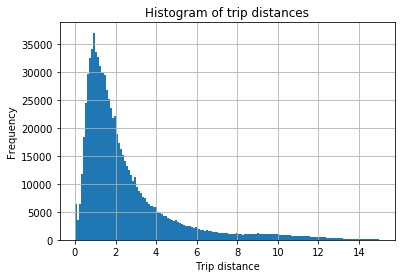

In [104]:
###GET A HISTOGRAM FOR TRIP DISTANCE
###THE INTERVAL HAS BEEN PRE SET
data.trip_distance.hist(bins=bin_array)
plt.title('Histogram of trip distances')
plt.ylabel('Frequency')
plt.xlabel('Trip distance')
plt.show()

#### From the above graph, we know the most common trip distance is about 1 mile. The histogram above is heavily skewed to the right, with most trip distance centered around 0-4 miles. And there is no trip distance larger than 15 miles in the dataset. 

#### Display a histogram of the fare total amounts. What can you say about the data?

In [93]:
###GRAPH A HISTOGRAM FOR THE FARE TOTAL AMOUNTS
###GET FARE DATA FIRST
fare= pd.read_csv('nyc_fare.csv',parse_dates=['pickup_datetime'] ,engine = 'python')

In [94]:
##GET INFO
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846945 entries, 0 to 846944
Data columns (total 11 columns):
medallion          846945 non-null object
hack_license       846945 non-null object
vendor_id          846945 non-null object
pickup_datetime    846945 non-null datetime64[ns]
payment_type       846945 non-null object
fare_amount        846945 non-null float64
surcharge          846945 non-null float64
mta_tax            846945 non-null float64
tip_amount         846945 non-null float64
tolls_amount       846945 non-null float64
total_amount       846945 non-null float64
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 71.1+ MB


In [91]:
###INSPECT DATA
fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [92]:
##INSPECT STATS
fare.describe().transpose()
###WE CAN SEE MAX FARE MOUNT IS 620 AND MIN IS -52
##WE DONOT KNOW WHAT HAPPENED WITH THOSE RIDES

,count,mean,std,min,25%,50%,75%,max
fare_amount,846945.0,12.190578,9.514150,-648.42,6.5,9.5,14.0,620.01
surcharge,846945.0,0.320303,0.772642,-1.00,0.0,0.0,0.5,628.84
mta_tax,846945.0,0.499305,0.057844,-0.50,0.5,0.5,0.5,41.49
tip_amount,846945.0,1.344660,2.091490,0.00,0.0,1.0,2.0,200.00
tolls_amount,846945.0,0.232142,1.109164,0.00,0.0,0.0,0.0,100.66
total_amount,846945.0,14.587073,11.380950,-52.50,8.0,11.0,16.5,620.01


In [100]:
##CHECK CATEGORICAL VARIABLES
print(fare.vendor_id.describe(),fare.vendor_id.value_counts())
print(fare.payment_type.describe(),fare.payment_type.value_counts())

count     846945
unique         2
top          CMT
freq      424678
Name: vendor_id, dtype: object CMT    424678
VTS    422267
Name: vendor_id, dtype: int64
count     846945
unique         5
top          CRD
freq      456019
Name: payment_type, dtype: object CRD    456019
CSH    387455
NOC      1921
UNK       984
DIS       566
Name: payment_type, dtype: int64


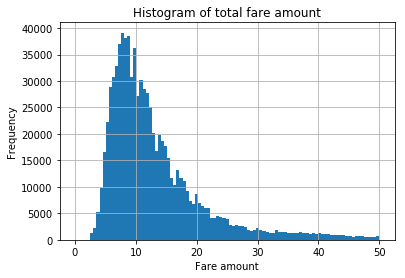

In [103]:
##GRAPH HISTOGRAM FOR FARE
##FOR GRAPH WE BASE ON MEAN AND STD
##PERSONALLY I THINK THE RANGE OF 3STD IS LARGE ENOUGH
fare.total_amount.hist(bins= np.linspace(start=0., stop=50, num=100))
plt.title('Histogram of total fare amount')
plt.ylabel('Frequency')
plt.xlabel('Fare amount')
plt.show()


#### The fare amount histogram above shows that the total fare of trips is skewed to the right, with most fare amount concentrates in the range between 5-20 USD. The most frequent fare amount is 9 USD. 

#### How many unusually long trips (of greater than 100 miles) do you see?

In [109]:
data.trip_distance.describe()

count    8.469450e+05
mean     9.958211e+00
std      6.525205e+03
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.200000e+00
max      6.005123e+06
Name: trip_distance, dtype: float64

In [110]:
data[data.trip_distance >100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


#### There are four unusually long trips which are greater than 100 miles. In the first record, the trip distance is too long, which we think might be an error. In the second record, the trip time is too long compared to the trip distance. In the third record, the trip time is only 1 second with 442 miles, so we think it might also be an error. In the forth record, nothing is suspicious at a glance.  

## Filtering with boolean indexing
### Select long rides

data.loc[data.trip_distance > 100]

In [ ]:
#End